In [1]:
import pandas as pd
import numpy as np

In [2]:
filename="automobileEDA.csv"

In [3]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
#2. Analyzing Individual Feature Patterns Using Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [6]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [7]:
df['highway-mpg'].corr(df['price'])

-0.7046922650589534

In [8]:
#Question  #2:
#Tìm mối tương quan giữa các cột sau:
df[['bore','stroke','compression-ratio','horsepower']].corr()


,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53379.38189806302)

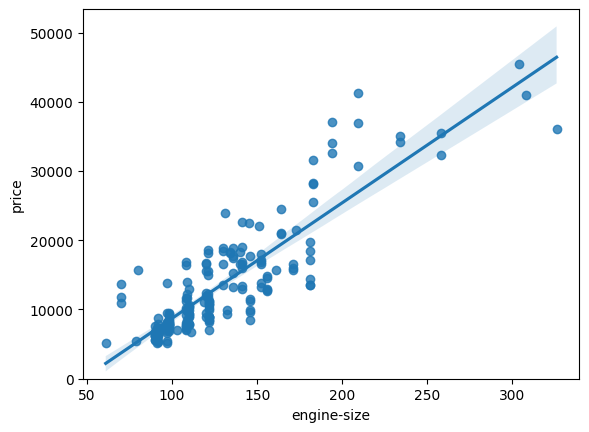

In [9]:
#<h2>Continuous Numerical Variables:</h2>
#Positive Linear Relationship(Mối quan hệ tuyến tính tích cực)
#Let's find the scatterplot of "engine-size" and "price".
# Engine size as potential predictor variable of price
#Khi kích thước động cơ tăng, giá cũng tăng: điều này cho thấy mối tương quan trực tiếp tích cực giữa hai biến số này. 
#Kích thước động cơ có vẻ như là một yếu tố dự đoán khá tốt về giá vì đường hồi quy gần như là một đường chéo hoàn hảo
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [10]:
#Khi kích thước động cơ tăng, giá cũng tăng: điều này cho thấy 
#mối tương quan trực tiếp tích cực giữa hai biến số này.
# Kích thước động cơ có vẻ như là một yếu tố dự đoán khá tốt về 
# giá vì đường hồi quy gần như là một đường chéo hoàn hảo.
#Chúng ta có thể kiểm tra mối tương quan giữa 'kích thước động cơ' và 'giá' và thấy rằng nó xấp xỉ 0,87.
df[["engine-size", "price"]].corr()


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

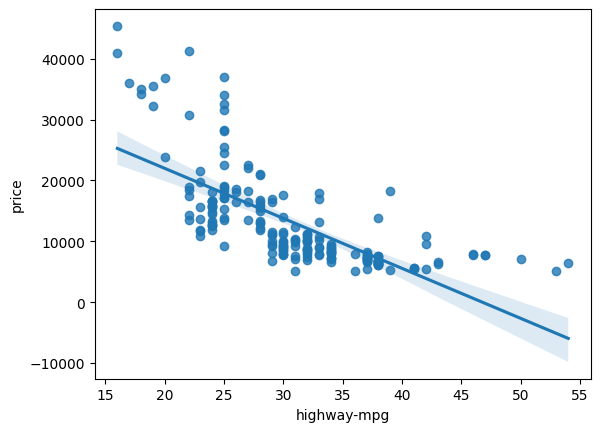

In [11]:
# Hãy tìm biểu đồ phân tán của "highway-mpg" và "price".
#Khi đường cao tốc-mpg tăng, giá sẽ giảm: điều này cho thấy mối quan hệ nghịch đảo/tiêu cực giữa hai biến này. 
#MPG trên đường cao tốc có thể là một yếu tố dự báo giá.
sns.regplot(x="highway-mpg", y="price", data=df)

In [12]:
#Khi đường cao tốc-mpg tăng, giá sẽ giảm: điều này cho thấy mối quan hệ nghịch
# đảo/tiêu cực giữa hai biến này. MPG trên đường cao tốc có thể là một yếu tố dự báo giá.
#Chúng ta có thể kiểm tra mối tương quan giữa 'đường cao tốc-mpg' và 'giá' và thấy nó xấp xỉ -0,704.
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

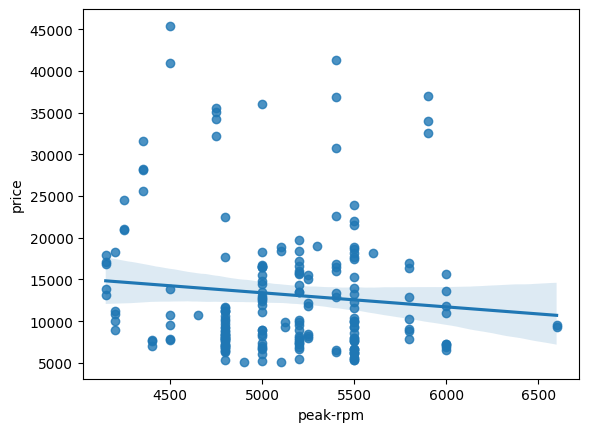

In [13]:
# Weak Linear Relationship
#Hãy xem liệu "peak-rpm" có phải là biến dự đoán của "giá" hay không.
sns.regplot(x="peak-rpm", y="price", data=df)

In [14]:
#Vòng tua máy cao nhất dường như không phải là một yếu tố dự báo tốt về giá vì đường hồi quy gần như nằm ngang.
# Ngoài ra, các điểm dữ liệu rất rải rác và cách xa đường thẳng phù hợp, cho thấy rất nhiều biến đổi. 
#Vì vậy, đây không phải là một biến đáng tin cậy.
#Chúng ta có thể kiểm tra mối tương quan giữa 'vòng tua máy cao nhất' và 'giá' và thấy nó xấp xỉ -0,101616.
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

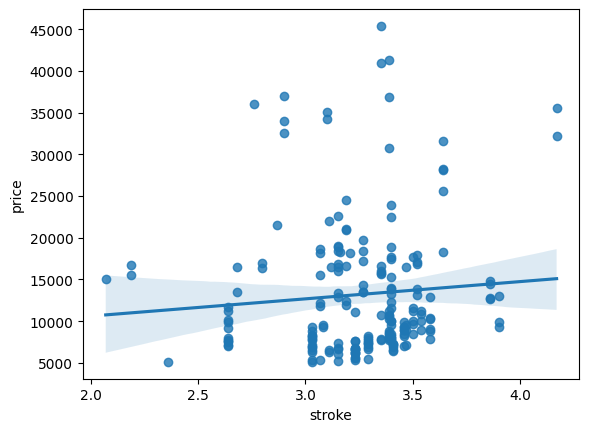

In [15]:
# Question  3A
#Tìm mối tương quan giữa vx="stroke" and y="price".
sns.regplot(x="stroke", y="price", data=df)



In [16]:
#stroke dường như không phải là một yếu tố dự báo tốt về giá vì đường hồi quy gần như nằm ngang.
# Ngoài ra, các điểm dữ liệu rất rải rác và cách xa đường thẳng phù hợp, cho thấy rất nhiều biến đổi. 
#Vì vậy, đây không phải là một biến đáng tin cậy.
#Chúng ta có thể kiểm tra mối tương quan giữa "stroke","price"] và thấy nó xấp xỉ 0.08231.
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


In [17]:
#Categorical Variables (Các biến phân loại)
#Đây là các biến mô tả 'đặc điểm' của đơn vị dữ liệu và được chọn từ một nhóm nhỏ các danh mục.
# Các biến phân loại có thể có kiểu "object" hoặc "int64". 
#Một cách hay để trực quan hóa các biến phân loại là sử dụng boxplots.

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='body-style', ylabel='price'>

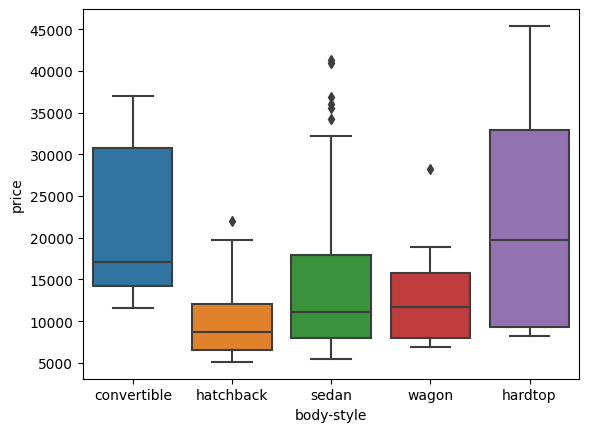

In [18]:
#Chúng ta hãy nhìn vào mối quan hệ giữa "kiểu dáng cơ thể" và "giá cả".
sns.boxplot(x="body-style", y="price", data=df)

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='engine-location', ylabel='price'>

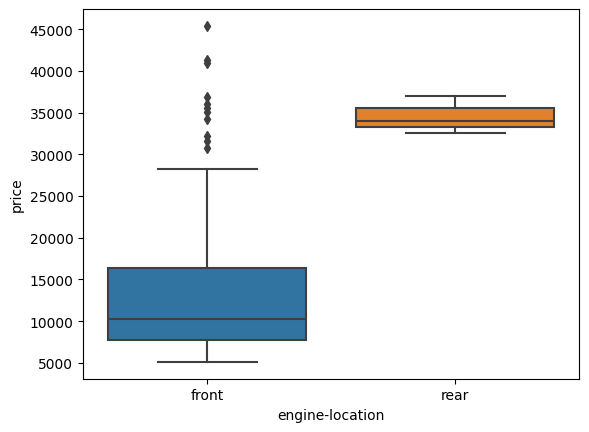

In [19]:
#Chúng tôi thấy rằng sự phân bổ giá giữa các danh mục kiểu dáng thân xe khác nhau có sự trùng lặp đáng kể, 
#do đó, kiểu dáng thân xe sẽ không phải là một yếu tố dự báo tốt về giá.
# Hãy kiểm tra động cơ "engine-location" and "price"vị trí động cơ" và "giá":
sns.boxplot(x="engine-location", y="price", data=df)


In [20]:
#Ở đây, chúng tôi thấy rằng sự phân bổ giá giữa hai loại vị trí động cơ này, 
#phía trước và phía sau, đủ khác biệt để coi vị trí động cơ là một yếu tố dự báo giá tốt tiềm năng

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='drive-wheels', ylabel='price'>

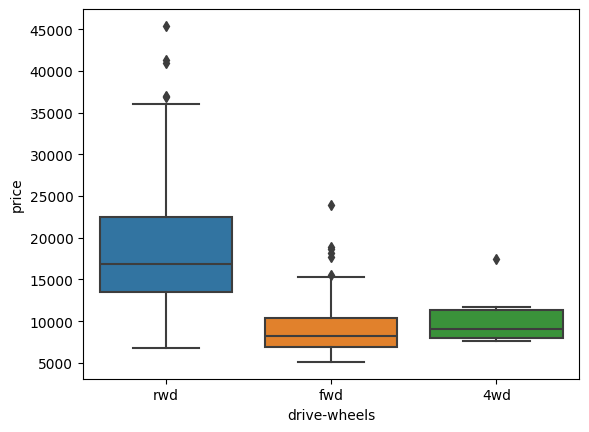

In [21]:
#Let's examine "drive-wheels" and "price".
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

In [22]:
#Ở đây chúng ta thấy rằng sự phân bổ giá giữa các loại bánh dẫn động khác nhau là khác nhau. 
#Như vậy, bánh dẫn động có thể là yếu tố dự đoán giá cả.

In [23]:
# # 3. 3. Descriptive Statistical Analysis Phân tích thống kê mô tả
# <p>Trước tiên chúng ta hãy xem xét các biến bằng cách sử dụng phương pháp mô tả.</p>

# <p>Hàm <b>mô tả</b> tự động tính toán số liệu thống kê cơ bản cho tất cả các biến liên tục. 
#Mọi giá trị NaN đều tự động bị bỏ qua trong các thống kê này.</p>

# Điều này sẽ hiển thị:

# <ul>
#     <li>số lượng biến đó</li>
#     <li>ý nghĩa</li>
#     <li>độ lệch chuẩn (std)</li>
#     <li>giá trị tối thiểu</li>
#     <li>IQR (Phạm vi tứ phân vị: 25%, 50% và 75%)</li>
#     <li>giá trị tối đa</li>
# <ul>

In [24]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [25]:
# Cài đặt mặc định của "mô tả" bỏ qua các biến của loại đối tượng.
# Chúng ta có thể áp dụng phương pháp “mô tả” trên các biến kiểu “đối tượng” như sau:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [26]:
# #Value Counts
# Số lượng giá trị là một cách hay để hiểu số lượng đơn vị của mỗi đặc tính/biến mà chúng ta có. 
# Chúng ta có thể áp dụng phương pháp "value_counts" trên cột "bánh xe dẫn động".
# Đừng quên phương thức "value_counts" chỉ hoạt động trên chuỗi gấu trúc chứ không phải trên khung dữ liệu gấu trúc.
# Do đó, chúng tôi chỉ bao gồm một dấu ngoặc <code>df['drive-wheels']
# </code> chứ không bao gồm hai dấu ngoặc <code>df[['drive-wheels']]</code
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [27]:
#Chúng ta có thể chuyển đổi chuỗi thành khung dữ liệu như sau:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [28]:
#Hãy lặp lại các bước trên nhưng lưu kết quả vào khung dữ liệu
# "drive_wheels_counts" và đổi tên cột 'drive-wheels' thành 'value_counts'.
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [29]:
#Bây giờ hãy đổi tên chỉ mục thành 'bánh lái''drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts


,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [30]:
#Chúng ta có thể lặp lại quá trình trên cho biến 'vị trí động cơ'.
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [31]:
# Sau khi kiểm tra số lượng giá trị của vị trí động cơ, chúng tôi thấy rằng vị trí động cơ không phải 
# là biến dự đoán tốt về giá. Đó là do chúng ta chỉ có 3 xe có động cơ phía sau và 198 xe có động cơ 
# phía trước nên kết quả này bị sai lệch. 
# Vì vậy, chúng tôi không thể đưa ra bất kỳ kết luận nào về vị trí động cơ

In [32]:
# #4. Basics of Grouping Khái niệm cơ bản về phân nhóm
# Phương thức "groupby" nhóm dữ liệu theo các danh mục khác nhau. 
# Dữ liệu được nhóm dựa trên một hoặc một số biến và việc phân tích
# được thực hiện trên từng nhóm riêng lẻ.
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [33]:
# <p>Nếu muốn biết trung bình loại bánh dẫn động nào có giá trị nhất, 
# chúng ta có thể nhóm các "bánh dẫn động" rồi tính trung bình chúng.</p>

# <p>Chúng ta có thể chọn các cột 'bánh lái', 'kiểu thân xe' và 'giá', 
# sau đó gán nó cho biến "df_group_one".</p>
df_group_one = df[['drive-wheels','price']]

In [34]:
# Sau đó, chúng tôi có thể tính giá trung bình cho từng loại dữ liệu khác nhau.
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [35]:
# <p>Từ dữ liệu của chúng tôi, có vẻ như xe dẫn động cầu sau nhìn chung đắt nhất, 
# trong khi xe 4 bánh và dẫn động cầu trước có giá gần như nhau.</p>

# <p>Bạn cũng có thể nhóm theo nhiều biến. Ví dụ: hãy nhóm theo cả 'bánh dẫn động'
# và 'kiểu dáng thân xe'. Điều này nhóm khung dữ liệu theo sự kết hợp độc đáo giữa 
# 'bánh xe truyền động' và 'kiểu thân xe'. 
# Chúng ta có thể lưu trữ kết quả trong biến 'grouped_test1'.</p>

In [36]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [37]:
# <p>Dữ liệu được nhóm này sẽ dễ hình dung hơn nhiều khi được tạo thành bảng tổng hợp.
# Bảng tổng hợp giống như một bảng tính Excel, với một biến dọc theo cột và một biến khác dọc theo hàng. 
# Chúng ta có thể chuyển đổi khung dữ liệu thành bảng tổng hợp bằng phương pháp "pivot" để tạo bảng tổng hợp từ các nhóm.</p>


In [38]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [39]:
# Thông thường, chúng tôi sẽ không có dữ liệu cho một số ô tổng hợp.
# Chúng ta có thể điền giá trị 0 vào các ô bị thiếu này, nhưng bất kỳ giá trị nào khác cũng có thể được sử dụng.
# Cần phải đề cập rằng dữ liệu bị thiếu là một chủ đề khá phức tạp và là toàn bộ khóa học.</p>
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [40]:
#Question 4:
#Sử dụng chức năng "groupby" để tìm "giá"
# trung bình của mỗi chiếc xe dựa trên "kiểu dáng thân xe"
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [42]:
#Variables: Drive Wheels and Body Style vs. Price
# Hãy sử dụng bản đồ nhiệt để hình dung mối quan hệ giữa Phong cách cơ thể và Giá cả.

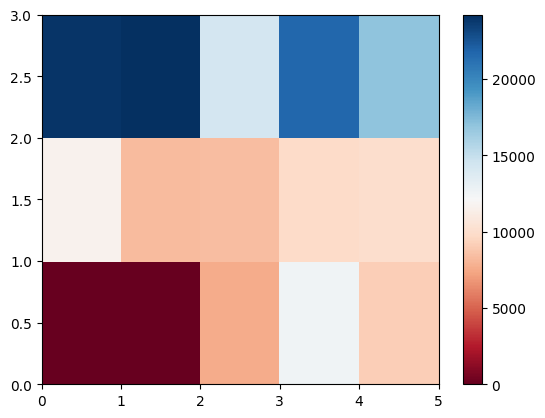

In [43]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [44]:
# <p>Bản đồ nhiệt vẽ biểu đồ biến mục tiêu (giá) tỷ lệ với màu sắc tương ứng với các 
# biến 'bánh lái' và 'kiểu thân xe' trên trục dọc và trục ngang tương ứng. 
# Điều này cho phép chúng ta hình dung mức giá có liên quan như thế nào với 'bánh lái' và 'kiểu dáng thân xe'.</p>

# <p>Các nhãn mặc định không truyền tải thông tin hữu ích nào cho chúng tôi. Hãy thay đổi điều đó:</

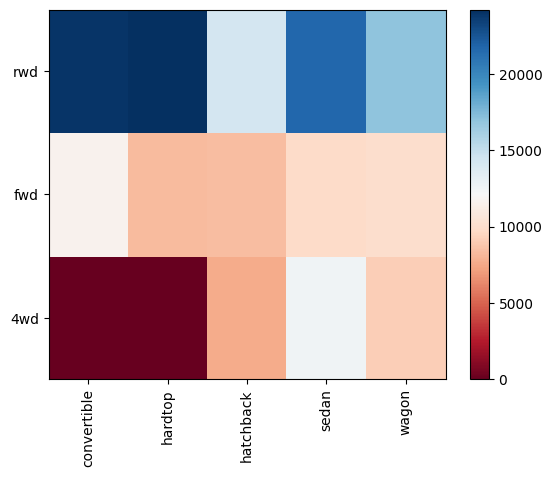

In [45]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [46]:
# <p>Trực quan hóa rất quan trọng trong khoa học dữ liệu và các gói trực quan hóa Python
# mang đến sự tự do tuyệt vời. Chúng ta sẽ đi sâu hơn trong một khóa học trực quan hóa 
# Python riêng biệt.</p>

# <p>Câu hỏi chính mà chúng tôi muốn trả lời trong học phần này là "Đặc điểm chính nào
# có tác động nhiều nhất đến giá ô tô?".</p>

# <p>Để có thước đo tốt hơn về các đặc điểm quan trọng, chúng tôi xem xét mối tương quan
# giữa các biến này với giá ô tô. Nói cách khác: giá ô tô phụ thuộc vào biến này như thế nào?</p>


In [47]:
# # 5. Correlation and Causation Tương quan và nhân quả
# <p><b>Mối tương quan</b>: thước đo mức độ phụ thuộc lẫn nhau giữa các biến.</p>
# <p><b>Quan hệ nhân quả</b>: mối quan hệ nhân quả giữa hai biến.</p>
# <p>Điều quan trọng là phải biết sự khác biệt giữa hai điều này. Sự tương quan nào không bao hàm nhân quả. 
# Việc xác định mối tương quan đơn giản hơn nhiều việc xác định quan hệ nhân quả vì quan hệ nhân quả 
#có thể yêu cầu thử nghiệm độc lập.</p>


In [48]:
# <p><b>Tương quan Pearson</b></p>
# <p>Tương quan Pearson đo lường sự phụ thuộc tuyến tính giữa hai biến X và Y.</p>
# <p>Hệ số kết quả là giá trị bao gồm từ -1 đến 1, trong đó:</p>
# <ul>
#     1: Tương quan tuyến tính dương hoàn hảo.</li>
#     0 Không có tương quan tuyến tính, hai biến này rất có thể không ảnh hưởng lẫn nhau.</li>
#     -1 Tương quan tuyến tính âm hoàn hảo.</li>
# </ul>

In [49]:
# <b>Giá trị P</b>

# <p>Giá trị P này là gì? Giá trị P là giá trị xác suất mà mối tương quan giữa hai biến này có ý nghĩa thống kê. Thông thường, chúng tôi chọn mức ý nghĩa là 0,05, nghĩa là chúng tôi tin cậy 95% rằng mối tương quan giữa các biến là đáng kể.</p>

# Theo quy ước, khi

# <ul>
#     <li>giá trị p là $<$ 0,001: chúng tôi cho rằng có bằng chứng chắc chắn rằng mối tương quan là đáng kể.</li>
#     <li>giá trị p là $<$ 0,05: có bằng chứng vừa phải cho thấy mối tương quan là đáng kể.</li>
#     <li>giá trị p là $<$ 0,1: có bằng chứng yếu cho thấy mối tương quan là đáng kể.</li>
#     <li>giá trị p là $>$ 0,1: không có bằng chứng nào cho thấy mối tương quan là đáng kể.</li>
# </ul>

In [50]:
from scipy import stats

In [51]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


In [52]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa chiều dài cơ sở và giá có ý nghĩa thống kê,
# mặc dù mối quan hệ tuyến tính không quá mạnh 

In [53]:
#Question 5:
#'horsepower' and 'price'
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 6.369057428259526e-48


In [54]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa horsepower và giá có ý nghĩa thống kê,

In [55]:
#Question 6
#'length' and 'price'
earson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 8.016477466159709e-30


In [56]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa ength và giá có ý nghĩa thống kê

In [57]:
#Question 7:
#'width' and 'price'
earson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 9.200335510482065e-38


In [58]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa width và giá có ý nghĩa thống kê

In [59]:
# Quession 8 
#Curb-Weight vs. Price:
earson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  


The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  2.189577238893972e-53


In [60]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa curb-weight và giá có ý nghĩa thống kê

In [61]:
#Question 9:
#Engine-Size vs. Price:
earson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  


The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  9.265491622200262e-64


In [62]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa engine-size và giá có ý nghĩa thống kê

In [63]:
#Quession
#Bore vs. Price:
earson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  8.04918948393533e-17


In [64]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa bore và giá có ý nghĩa thống kê

In [65]:
#Quession
#City-mpg vs. Price:
earson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  2.321132065567512e-29


In [66]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa City-mpg và giá có ý nghĩa thống kê

In [67]:
# Question 12
# Highway-mpg vs. Price:
earson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  1.7495471144475452e-31


In [68]:
# Vì giá trị p là $<$ 0,001 nên mối tương quan giữa highway-mpg và giá có ý nghĩa thống kê

In [69]:
# # ANOVA: Analysis of Variance
# <p>Phân tích phương sai (ANOVA) là một phương pháp thống kê được sử dụng để kiểm tra xem liệu
# có sự khác biệt đáng kể giữa giá trị trung bình của hai hoặc nhiều nhóm hay không. 
# ANOVA trả về hai tham số:</p>

# <p><b>Điểm kiểm tra F</b>: ANOVA giả định giá trị trung bình của tất cả các nhóm là như nhau, 
# tính toán mức độ trung bình thực tế khác với giả định và báo cáo đó là điểm kiểm tra F. 
# Điểm lớn hơn có nghĩa là có sự khác biệt lớn hơn giữa các phương tiện.</p>

# <p><b>Giá trị P</b>: Giá trị P cho biết giá trị điểm được tính toán của chúng tôi có ý nghĩa
# thống kê như thế nào.</p>

# <p>Nếu biến giá của chúng tôi có mối tương quan chặt chẽ với biến chúng tôi đang phân tích, 
# chúng tôi kỳ vọng ANOVA sẽ trả về điểm kiểm tra F khá lớn và giá trị p nhỏ.

In [70]:
# Drive Wheels


In [71]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [72]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [73]:
# Chúng ta có thể lấy các giá trị của nhóm phương thức bằng phương thức "get_group".
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [74]:
# Chúng ta có thể sử dụng hàm 'f_oneway' trong 'stats' của mô-đun để thu được
# <b>điểm kiểm tra F</b> và <b>giá trị P</b>.
# # ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


In [75]:
# Đây là một kết quả tuyệt vời với điểm kiểm tra F lớn cho thấy mối tương quan chặt chẽ và
# giá trị P gần như bằng 0 ngụ ý ý nghĩa thống kê gần như nhất định. Nhưng điều này có nghĩa 
# là cả ba nhóm được thử nghiệm đều có mối tương quan cao như vậy?


In [76]:
# Test price on group fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677366e-23


In [77]:
# Đây là một kết quả tuyệt vời với điểm kiểm tra F lớn cho thấy mối tương quan chặt chẽ và
# giá trị P gần như bằng 0 ngụ ý ý nghĩa thống kê gần như nhất định. Nhưng điều này có nghĩa 
# là cả ba nhóm được thử nghiệm đều có mối tương quan cao như vậy?

In [78]:
#4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225367


In [79]:
# F = 8.580681368924756, có nghĩa là có sự khác biệt đáng kể giữa các nhóm hoặc phân nhóm bạn đang xem xét.
# giá trị p rất nhỏ. Một giá trị p nhỏ thường được coi là có đủ bằng chứng để
#  bác bỏ giả thuyết không có sự khác biệt giữa các nhóm.
#nên bạn có thể bác bỏ giả thuyết không có sự khác biệt giữa các nhóm.
 

In [80]:
#4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.665465750252303 , P = 0.4162011669784502


In [81]:
# P = 0.4162011669784502, giá trị p khá lớn. 
# Một giá trị p lớn hơn ngưỡng xác định trước (thường là 0.05) 
#cho thấy không có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm.
#Giả thuyết rằng không có sự khác biệt đáng kể giữa các nhóm không bị bác bỏ.

